In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('validation/global_model_evaluation_results.json')
df

,dataset,algorithm,workspace,val_accuracy,val_loss,model_path,date
0,adult,fedavg,workspace_adult,0.863753,0.302286,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:23
1,cifar10,fedavg,workspace_cifar10,0.579800,1.210139,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:25
2,covtype,fedavg,workspace_covtype,0.853136,0.361824,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:27
3,fmnist,fedavg,workspace_fmnist,0.895700,0.321527,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:28
4,mnist,fedavg,workspace_mnist,0.989100,0.050516,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:29
5,svhn,fedavg,workspace_svhn,0.813691,1.453572,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:32
6,adult,fedprox,workspace_adult,0.863446,0.301488,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:32
7,cifar10,fedprox,workspace_cifar10,0.558400,1.576153,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:33
8,covtype,fedprox,workspace_covtype,0.827965,0.413938,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:36
9,fmnist,fedprox,workspace_fmnist,0.898800,0.702622,/home/marcelohaps/NVFlare-ResIA/custom/2102.02...,2025-11-05 16:51:36


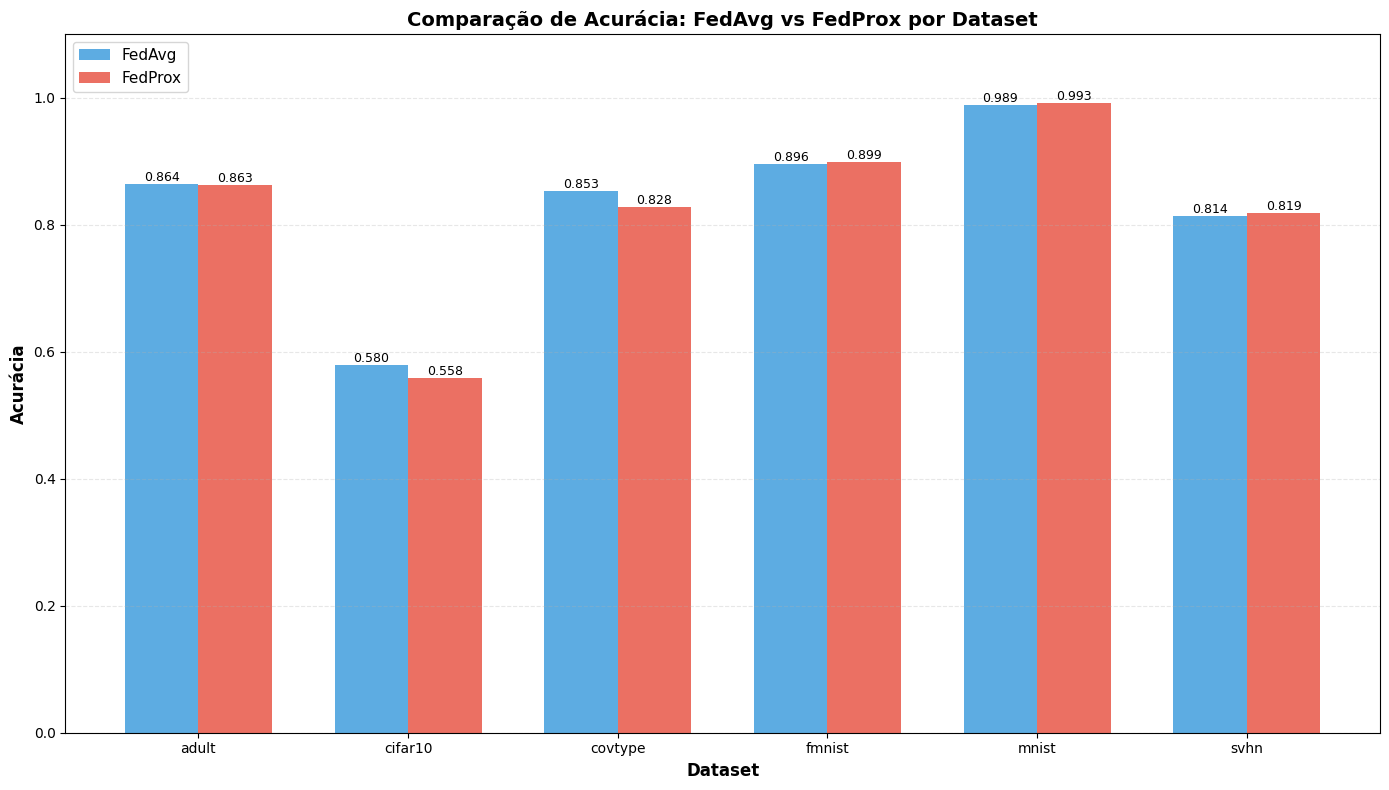

✅ Gráfico salvo em: validation/accuracy_comparison.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('validation/global_model_evaluation_results.csv')


plt.figure(figsize=(14, 8))
datasets = df['dataset'].unique()
algorithms = df['algorithm'].unique()
x = np.arange(len(datasets))
width = 0.35  
fedavg_acc = [df[(df['dataset'] == ds) & (df['algorithm'] == 'fedavg')]['val_accuracy'].values[0] 
              for ds in datasets]
fedprox_acc = [df[(df['dataset'] == ds) & (df['algorithm'] == 'fedprox')]['val_accuracy'].values[0] 
               for ds in datasets]

bars1 = plt.bar(x - width/2, fedavg_acc, width, label='FedAvg', alpha=0.8, color='#3498db')
bars2 = plt.bar(x + width/2, fedprox_acc, width, label='FedProx', alpha=0.8, color='#e74c3c')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

autolabel(bars1)
autolabel(bars2)

plt.xlabel('Dataset', fontsize=12, fontweight='bold')
plt.ylabel('Acurácia', fontsize=12, fontweight='bold')
plt.title('Comparação de Acurácia: FedAvg vs FedProx por Dataset', fontsize=14, fontweight='bold')
plt.xticks(x, datasets, fontsize=10)
plt.legend(fontsize=11, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, 1.1) 
plt.tight_layout()

plt.savefig('validation/accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em: validation/accuracy_comparison.png")